<h1 style="text-align: center;"> EE6380 - DEEP LEARNING - ASSIGNMENT 1</h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 

## Q1. Unit Norm Ball

In [2]:
def plot_norm_ball(p):
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.power(np.power(np.abs(X), p) + np.power(np.abs(Y), p), 1/p)
    plt.contour(X, Y, Z, levels=[1])
    plt.title('p = {}'.format(p))


<Figure size 200x200 with 0 Axes>

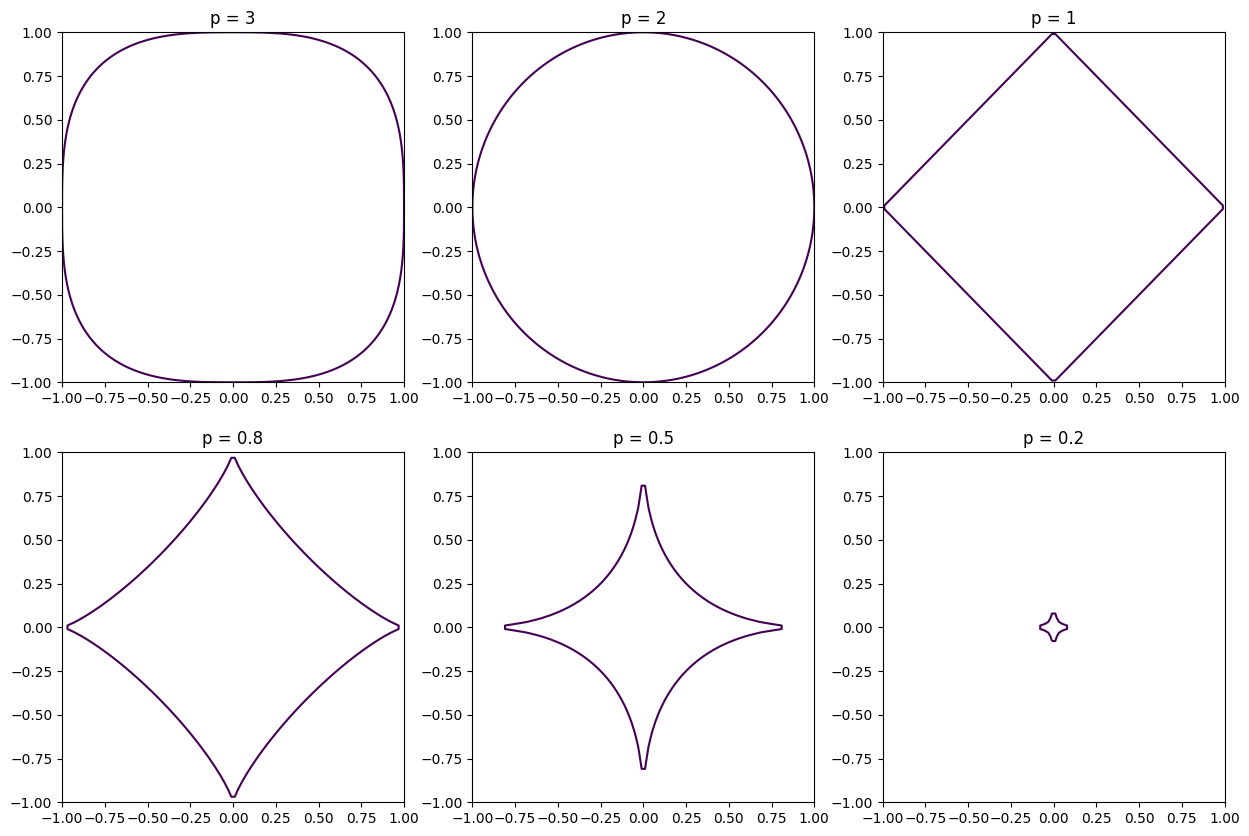

In [3]:
plt.figure(figsize=(2,2))
plt.figure(figsize=(15,10))
p_vals = [3,2,1,0.8,0.5,0.2]
for i in range(1,7):
    plt.subplot(2,3,i)
    plot_norm_ball(p_vals[i-1])
plt.show()

Clearly we can observe that for $p >= 1$, the unit norm ball \
and for $0 < p < 1$, the unit norm ball is not convex

## Q2. COMPLETENESS

Consider the following function
$$
f_n(x) = \frac{1}{1 + e^{-n(x - 0.5)}} \quad \text{for } x \in [0, 1]
$$
To prove pointwise convergence, we consider two cases based on the value of \( x \) within the interval \([0, 1]\).

Case 1: When $ x \in [0, 0.5) $:
   
In this case, $ n(x - 0.5) $ is negative.  As $ n\to\infty $ , $ e^{-n(x - 0.5)} \to\infty $, and the denominator $ 1 + e^{-n(x - 0.5)} \to\infty $. So, 

$$
\lim_{{n \to \infty}} f_n(x) = 0 \quad \text{for } x \in [0, 0.5)
$$

Case 2: When $ x \in (0.5, 1] $:

In this case, $ n(x - 0.5) $ is positive. As $ n\to\infty $ , $ e^{-n(x - 0.5)} \to 0 $, and the denominator $ 1 + e^{-n(x - 0.5)} $ goes to $ 1 + 0 = 1 $. So,

$$
\lim_{{n \to \infty}} f_n(x) = 1 \quad \text{for } x \in (0.5, 1]
$$

Case 3: When $ x = 0.5 $ :
In this case, $ n(x - 0.5) = 0$ . As $ n\to\infty $ , $ e^{-n(x - 0.5)} \to 1 $, and the denominator $ 1 + e^{-n(x - 0.5)} $ goes to $ 1 + 1 = 2 $. So,

$$
\lim_{{n \to \infty}} f_n(x) = 1 \quad \text{for } x = 0.5
$$

$$
\lim_{{n \to \infty}} f_n(x) =
\begin{cases}
    0 & \text{for } x \in [0, 0.5) \\
    \frac{1}{2} & \text{for } x = 0.5 \\
    1 & \text{for } x \in (0.5, 1]
\end{cases}
$$

$f_{n(x)}$ is not continous as $n \to\infty $. Hence it is not a complete space


### Let's verify this through the plot 

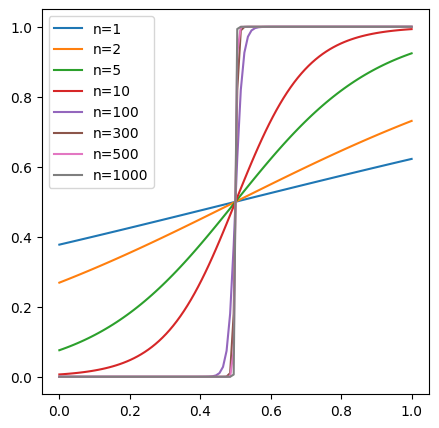

In [4]:
x = np.linspace(0, 1, 100)
y = []
n_vals = [1,2,5,10,100,300,500,1000]

for n in n_vals:
    y.append(1/(1+np.exp(-n*(x-0.5))))

plt.figure(figsize=(5,5))
for i in range(len(y)):
    plt.plot(x, y[i],label='n={}'.format(n_vals[i]))

plt.legend()
plt.show()


We can see that as n increases, the function becomes more and more like a step function (described above) and it is not continuous. \
Hence the space of continous functions defined on the closed interval [0,1] is incomplete



## Q3. Entropy Function

In [5]:
def calculate_entropy(probs):
    entropy = 0
    for prob in probs:
        if prob != 0:
            entropy += prob * np.log2(prob)
    return -entropy

#### Plot Entropy(Bern(p)) vs p

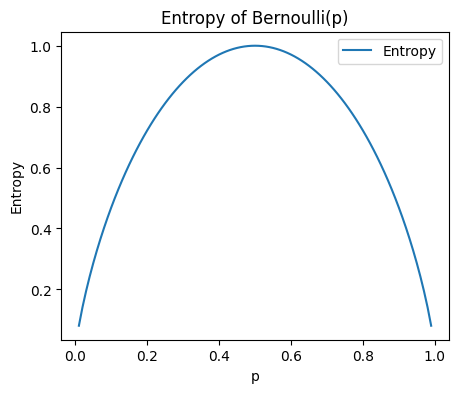

In [6]:
bern_p = np.arange(0.01,1,0.01)
entropies = []
for prob in bern_p:
    entropies.append(calculate_entropy([prob,1-prob]))

# Plot
plt.figure(figsize=(5, 4))
plt.plot(bern_p, entropies, label='Entropy')
plt.title('Entropy of Bernoulli(p)')
plt.xlabel('p')
plt.ylabel('Entropy')
plt.legend()
plt.show()


$H(p)$ is maximum when $ p = 0.5 $ and  $H(p) = 1$

## Q4. Image Entropy

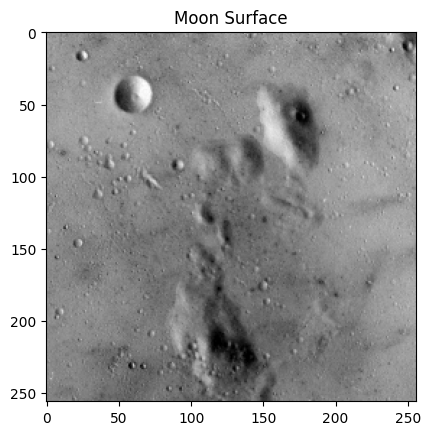

In [7]:
moon_image = plt.imread('5.1.09.tiff')
plt.imshow(moon_image,cmap='gray')
plt.title('Moon Surface')
plt.show()

In [8]:
def normalised_histogram(image):

    histogram = np.zeros(256)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    
    return histogram / (image.shape[0] * image.shape[1])

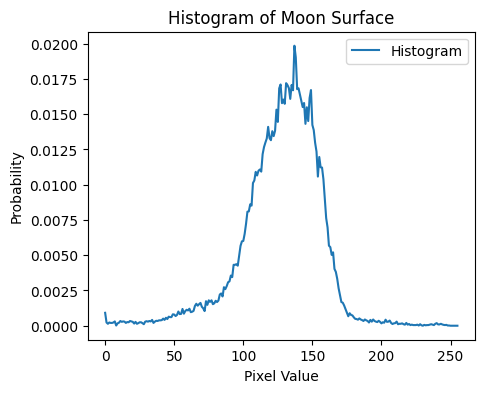

The PMF of the Moon Image closely resembles a Gaussian Distribution
Entropy of the Moon Image : 6.709312335966639


In [9]:
histogram_moon = normalised_histogram(moon_image)
## PLot the histogram
plt.figure(figsize=(5, 4))
plt.plot(np.arange(0, 256), histogram_moon, label='Histogram')
plt.title('Histogram of Moon Surface')
plt.xlabel('Pixel Value')
plt.ylabel('Probability')
plt.legend()
plt.show()
print('The PMF of the Moon Image closely resembles a Gaussian Distribution')
entropy_moon = calculate_entropy(histogram_moon)
print(f'Entropy of the Moon Image : {entropy_moon}')


In [10]:
aerial_image = plt.imread('5.1.10.tiff')
clock_image = plt.imread('5.1.12.tiff')

In [11]:
aerial_histogram = normalised_histogram(aerial_image)
clock_histogram = normalised_histogram(clock_image)

aerial_entropy = calculate_entropy(aerial_histogram)
clock_entropy = calculate_entropy(clock_histogram)

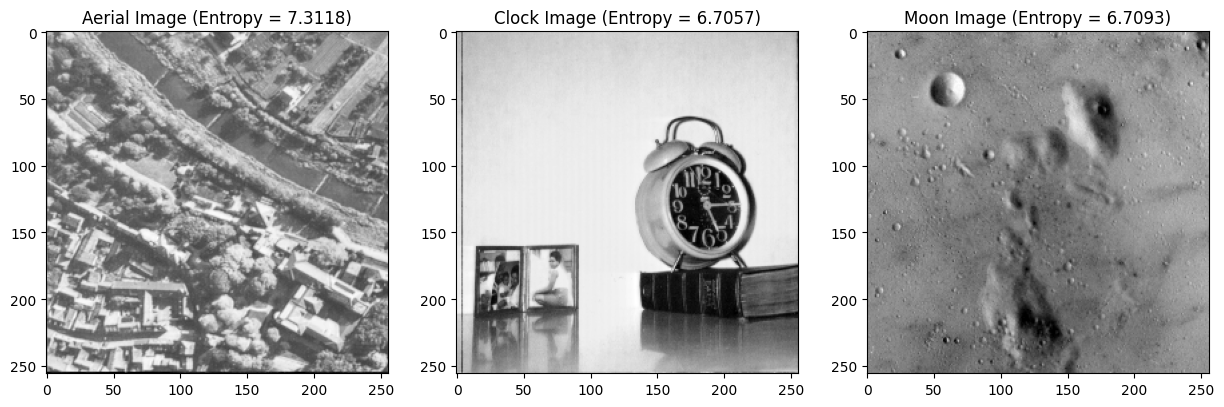

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(aerial_image,cmap='gray')
plt.title(f'Aerial Image (Entropy = {aerial_entropy:.4f})')
plt.subplot(1,3,2)
plt.imshow(clock_image,cmap='gray')
plt.title(f'Clock Image (Entropy = {clock_entropy:.4f})')
plt.subplot(1,3,3)
plt.imshow(moon_image,cmap='gray')
plt.title(f'Moon Image (Entropy = {entropy_moon:.4f})')
plt.show()

Since the Aerial has higher variance (more randomness). It has a higher entropy. The clock and Moon Image show less variance. In some patches, there is hardly any variance in the image. Hence they have a lower entropy

## Q5. Joint PMF and Joint Entropy

In [13]:
def FSCS(img):
    a = np.min(img)
    b = np.max(img)
    return ((img-a)*255/(b-a)).astype(np.uint8)

def normalised_joint_histogram(img1,img2):

    pmf = np.zeros((256,256))
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            pmf[img1[i,j],img2[i,j]] += 1
    

    return pmf / (img1.shape[0] * img1.shape[1])

In [14]:
img1 = plt.imread('left.png')
img2 = plt.imread('right.png')

## FSCS (Full Scale Contrast Stretching)
img1 = FSCS(img1)
img2 = FSCS(img2)

joint_pmf = normalised_joint_histogram(img1,img2)

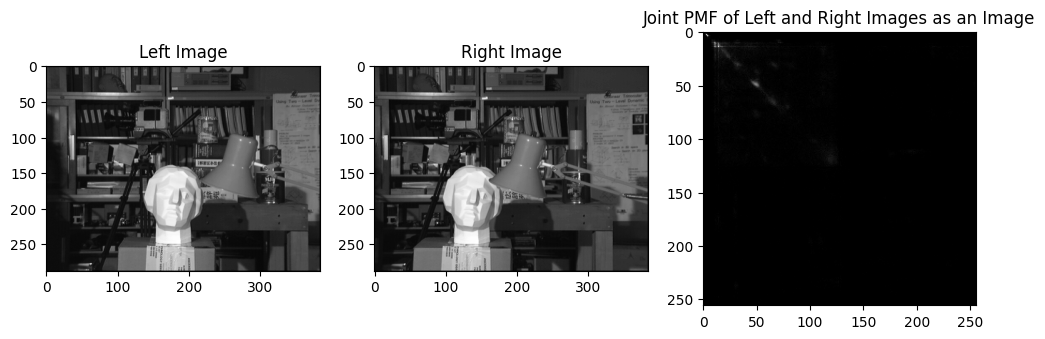

In [15]:

## Rescaling to plot the image
rescaled_joint_pmf = FSCS(joint_pmf)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
plt.imshow(img1,cmap='gray')
plt.title('Left Image')
plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title('Right Image')
plt.subplot(1,3,3)
plt.imshow(rescaled_joint_pmf,cmap='gray')
plt.title('Joint PMF of Left and Right Images as an Image')
plt.show()

### Some parts of the diagonal have higher probabilty of occurence

In [16]:
def joint_entropy(joint_pmf):
    joint_entropy = 0
    for i in range(256):
        for j in range(256):
            if joint_pmf[i,j] :
                joint_entropy += joint_pmf[i,j] *np.log2(joint_pmf[i,j])

    return -joint_entropy


In [17]:
joint_entropy_lr = joint_entropy(joint_pmf)
print(f'joint_entropy of the two images : {joint_entropy_lr}')

joint_entropy of the two images : 13.675203263376206


## Q6. Conditional PMF and conditional entropy

In [18]:
def conditional_pmf(joint_pmf,index,value):
    '''
    index : 0(x) or 1(y) 
    value : 0-len(joint_pmf)-1
    '''
    if index == 0:
        if (np.sum(joint_pmf[value,:])) == 0:
            return np.zeros(len(joint_pmf))
        conditional_pmf = joint_pmf[value,:]/(np.sum(joint_pmf[value,:]))
    else:
        if (np.sum(joint_pmf[:,value])) == 0:
            return np.zeros(len(joint_pmf))
        conditional_pmf = joint_pmf[:,value]/(np.sum(joint_pmf[:,value]))
    
    return conditional_pmf

$$
H(Y|X) = \sum_{x \in X} p(x) \cdot H(Y|X=x)
$$

In [19]:
def conditional_entropy(joint_pmf,index):
    '''
    index : 0 or 1
    value : 0-255
    '''
    conditional_entropy = 0
    for i in range(len(joint_pmf)):

        conditional_pmf_ = conditional_pmf(joint_pmf,index,i)
        if index == 0:
            p_marginal = np.sum(joint_pmf[i,:])
        else:
            p_marginal = np.sum(joint_pmf[:,i])
        
        conditional_entropy += p_marginal * calculate_entropy(conditional_pmf_)

    
    return conditional_entropy

In [20]:
conditional_entropy_x_given_y = conditional_entropy(joint_pmf,1)
conditional_entropy_y_given_x = conditional_entropy(joint_pmf,0)

print(f'H(X|Y) : {conditional_entropy_x_given_y}')
print(f'H(Y|X) : {conditional_entropy_y_given_x}')

H(X|Y) : 6.396577731686182
H(Y|X) : 6.41690915863236


## Q7. KL Divergence

In [1]:
def KL_Div(p,q):
    KL_Div = 0
    for i in range(len(p)):
        
        if p[i] and q[i]:
                KL_Div += p[i] * np.log2(p[i]/q[i])
    
    return KL_Div

In [4]:
r = 0.5
D_pq = np.zeros(99)
D_qp = np.zeros(99)
for i in range(0,99):
    bern_p = [r,1-r]
    s = (i+1)/100
    bern_q = [s,1-s]
    D_pq[i] = KL_Div(bern_p,bern_q)
    D_qp[i] = KL_Div(bern_q,bern_p)
    

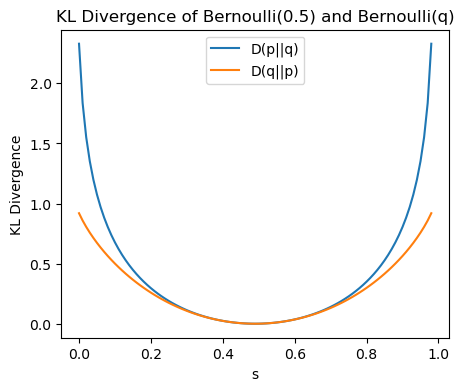

In [5]:
## Plot D_pq and D_qp
plt.figure(figsize=(5, 4))
plt.plot(np.arange(0, 0.99, 0.01), D_pq, label='D(p||q)')
plt.plot(np.arange(0, 0.99, 0.01), D_qp, label='D(q||p)')
plt.title('KL Divergence of Bernoulli(0.5) and Bernoulli(q)')
plt.xlabel('s')
plt.ylabel('KL Divergence')
plt.legend()
plt.show()


b ii) Clearly $D(p \| q) >=0 $ and $D(q \| p) >=0$ \
b iii) From the above graph, we can see that $D(p \| q) \neq D(q \| p) $ \
$D(p \| q) = D(q \| p) $ only when $ s =r =0.5 $ i.e when $p \sim q$  

In [6]:
pmf1 = normalised_histogram(img1)
pmf2 = normalised_histogram(img2)

D_pq = KL_Div(pmf1,pmf2)
D_qp = KL_Div(pmf2,pmf1)

print(f'D(p||q) : {D_pq}')
print(f'D(q||p) : {D_qp}')

NameError: name 'normalised_histogram' is not defined

$D(p \| q)$ is not such a good measure of similarity. We can see from above that values are quite high even though the images are a stereo pair. It is definitely not translation invariant. Also the KL Divergence is based on the Histogram which is just based on the number of times a intensity value is seen in the image. There is no sense of structure here